<h1> Clustering con K-means </h1>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [32]:
!pip install yellowbrick

<h4> Preparando datos de prueba </h4>

In [2]:
X, y, c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2, return_centers=True)

In [4]:
df_blobs = pd.DataFrame(
        {
            'x1': X[:,0],
            'x2': X[:,1],
            'y': y
        }
)

In [5]:
df_blobs

,x1,x2,y
0,2.979590,1.286257,2
1,4.745943,9.315229,0
2,1.944829,1.575744,2
3,-8.025381,-5.409284,3
4,-9.090561,-3.754022,3
...,...,...,...
495,-8.159781,-3.021798,3
496,2.488873,-0.935638,1
497,4.696895,8.990588,0
498,-8.681140,-5.041944,3


In [6]:
df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2': c[:,1]
    }
)

<h3> Visualización de datos </h3>

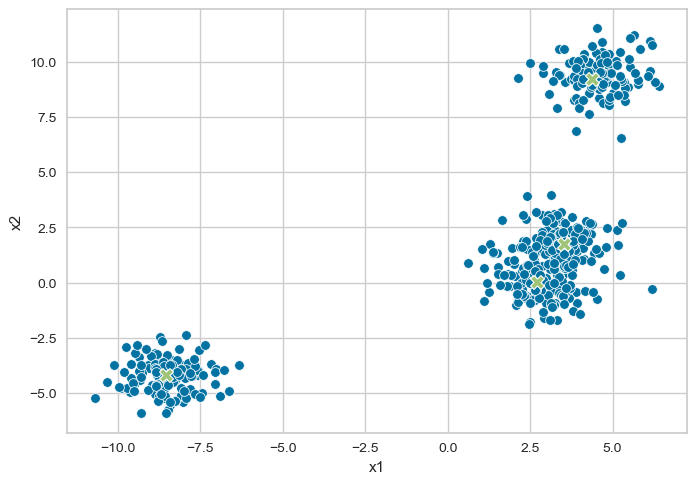

In [7]:
sns.scatterplot(data=df_blobs, x='x1', y='x2')
sns.scatterplot(data=df_centers, x='x1', y='x2', marker='X', s=100)
plt.show()

<h3> Aplicando K-Means </h3>

In [10]:
kmeans = KMeans(n_clusters=4)
df_cluster = kmeans.fit_predict(X)
df_blobs['cluster'] = df_cluster
k_means_centers = kmeans.cluster_centers_
df_k_means_center = pd.DataFrame(
    {
        'x1':k_means_centers[:,0],
        'x2':k_means_centers[:,1]
    }
)

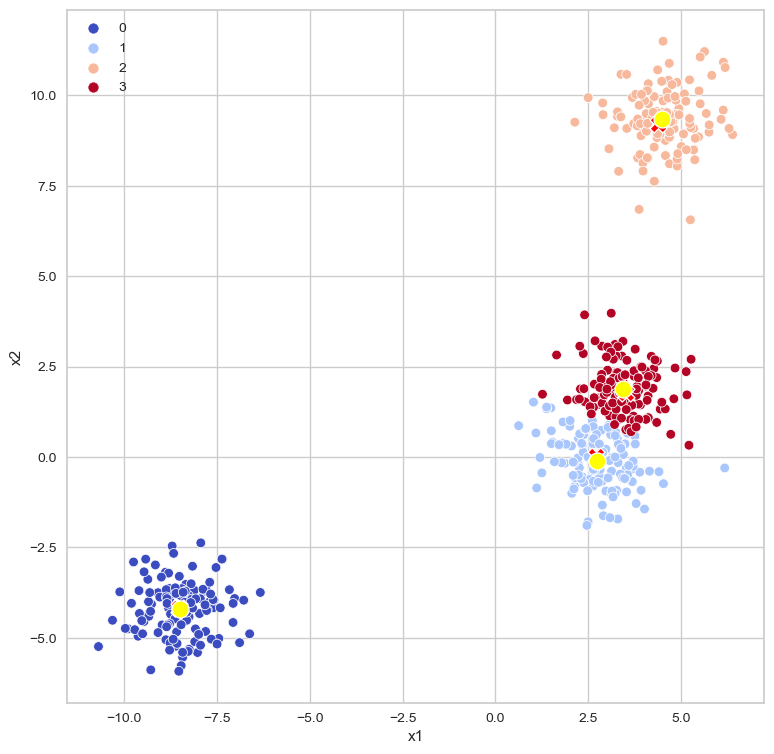

In [11]:
fig = plt.figure(figsize=(9,9))
sns.scatterplot(data=df_blobs,  x='x1', y='x2', hue= 'cluster', palette='coolwarm')
sns.scatterplot(data=df_centers,  x='x1', y='x2', marker='X', s=150 , color='red')
sns.scatterplot(data=df_k_means_center,  x='x1', y='x2', marker='o', s=150 , color='yellow')
plt.show()

In [13]:
def vis_cluster(k):
    kmeans = KMeans(n_clusters=k)
    df_cluster = kmeans.fit_predict(X)
    df_blobs['cluster'] = df_cluster
    k_means_centers = kmeans.cluster_centers_
    df_k_means_center = pd.DataFrame(
        {
            'x1':k_means_centers[:,0],
            'x2':k_means_centers[:,1]
        }
    )
    fig = plt.figure(figsize=(9,9))
    sns.scatterplot(data=df_blobs,  x='x1', y='x2', hue= 'cluster', palette='coolwarm')
    sns.scatterplot(data=df_centers,  x='x1', y='x2', marker='X', s=150 , color='red')
    sns.scatterplot(data=df_k_means_center,  x='x1', y='x2', marker='o', s=150 , color='yellow')
    plt.show()

3


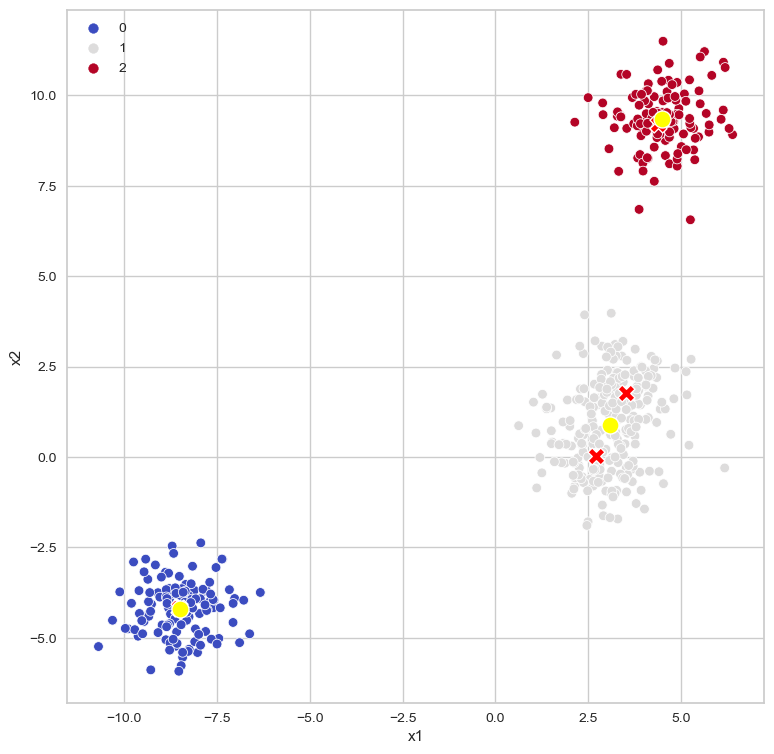

4


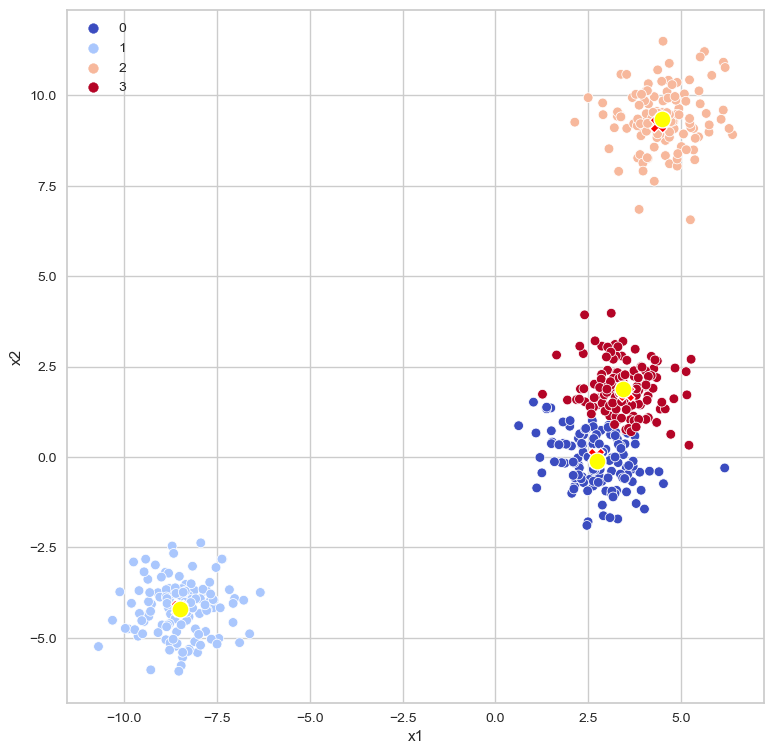

5


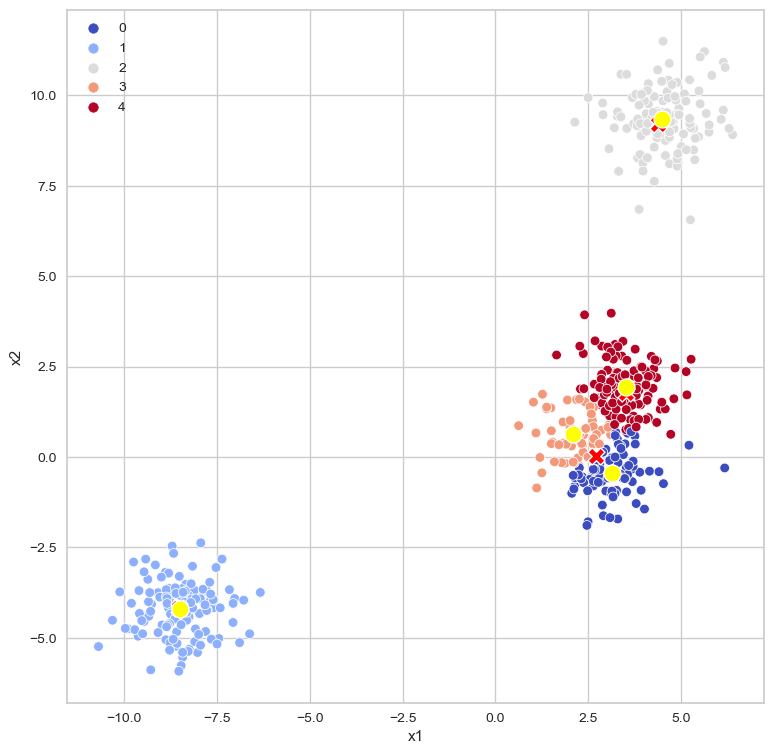

6


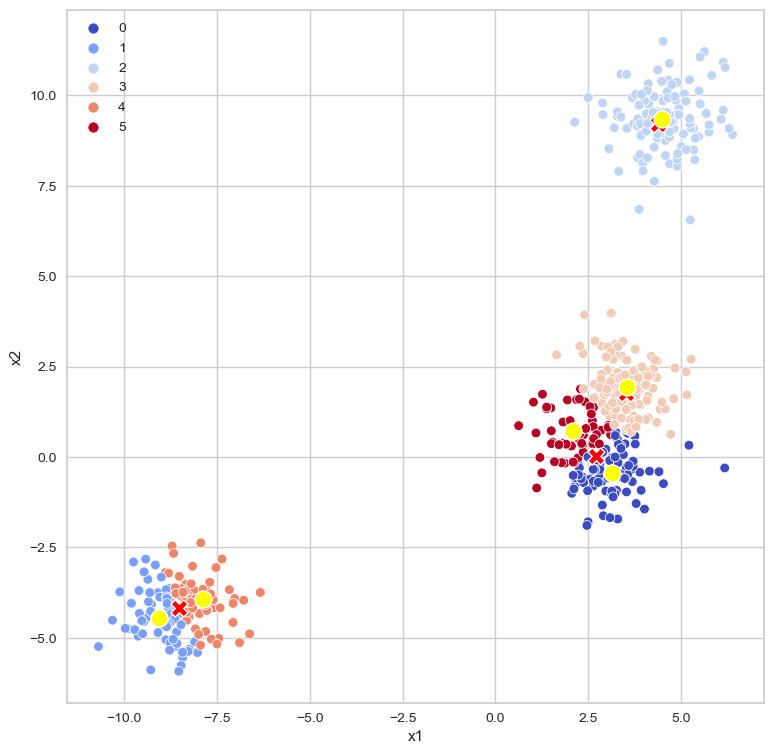

In [14]:
 for _ in range(3, 7):
        print(_)
        vis_cluster(_)

<h3> Encontrando el valor de K </h3>

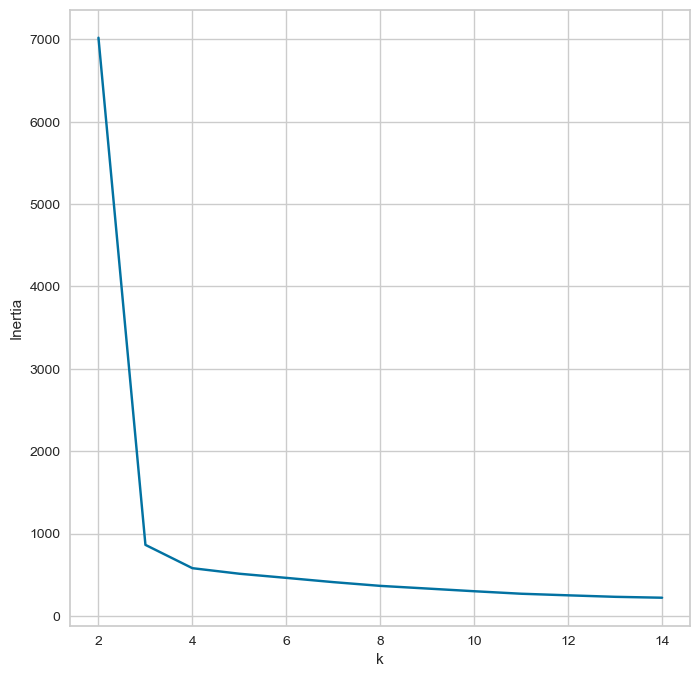

In [17]:
sum_of_squared_distances = []
K = range(2, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)
    
plt.figure(figsize = (8,8))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

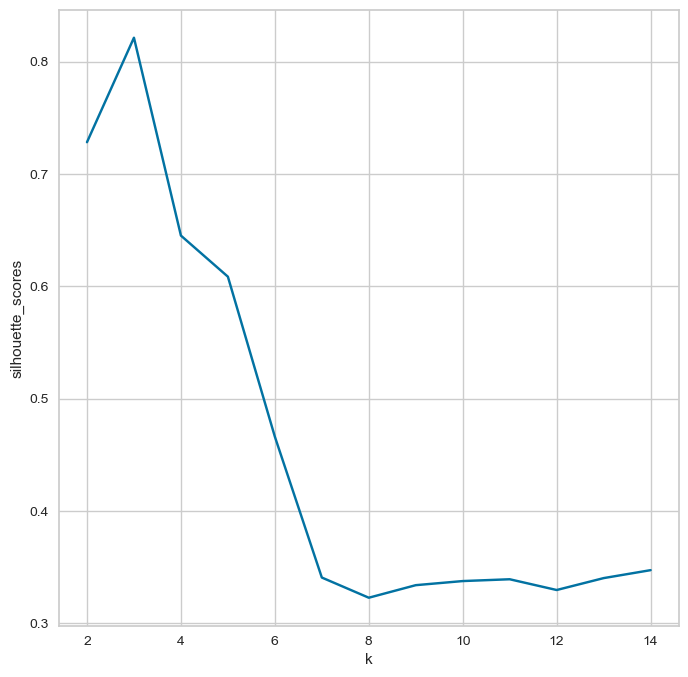

In [20]:
silhouette_scores = []
K = range(2, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    y = km.predict(X)
    silhouette_scores.append(silhouette_score(X, y))
    
plt.figure(figsize = (8,8))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_scores')
plt.show()

<h3> Evaluando clusters con K-means </h3>

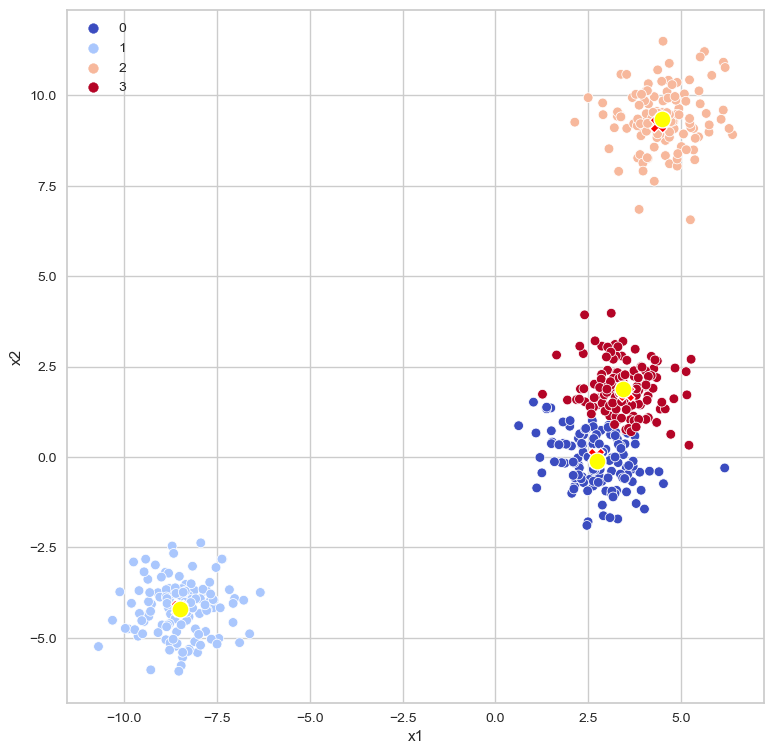

In [21]:
vis_cluster(4)

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(n_clusters=4))

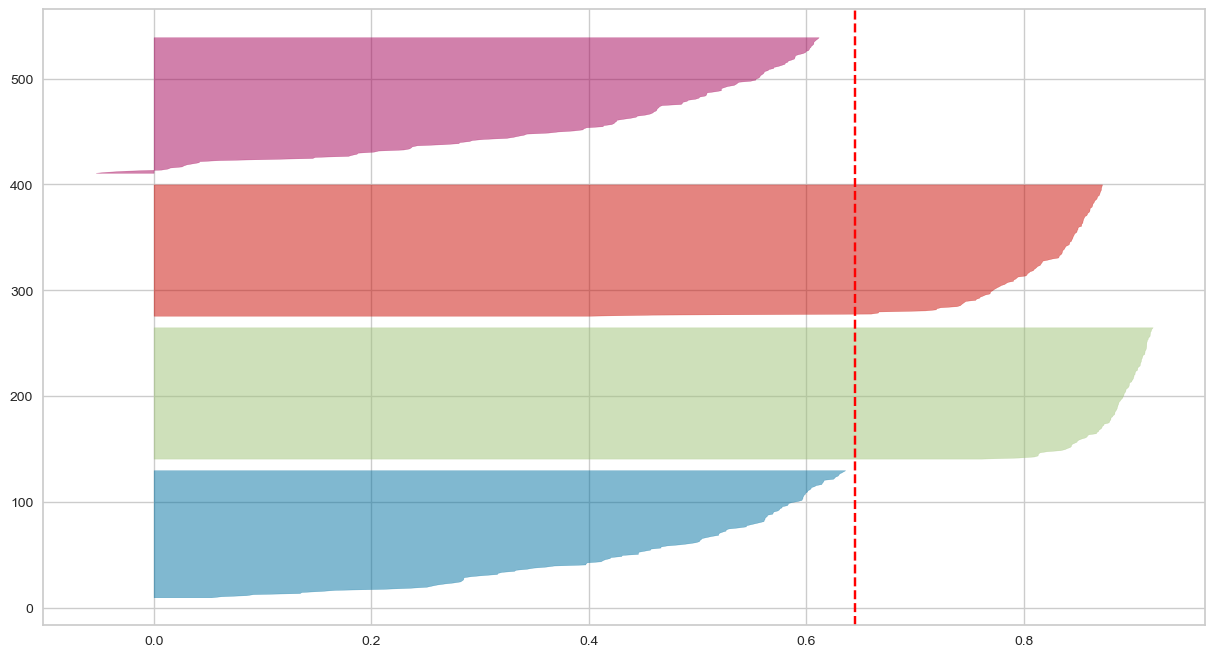

In [34]:
plt.figure(figsize=(15,8))
km = KMeans(n_clusters=4) 
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(X)